In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

C:\Users\minji\AppData\Local\Temp/ipykernel_22960/2026922495.py:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


tensor([[-0.5041],
        [-2.1939],
        [-0.6401],
        [ 0.8287],
        [ 0.0881]])


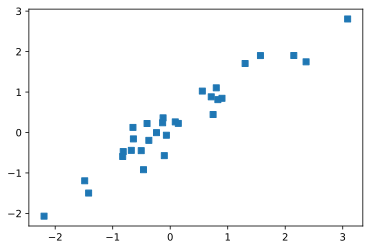

In [9]:
# create data
N = 30
x = torch.randn(N, 1)
y = x + torch.randn(N, 1)/2
print(x[:5,:])

plt.plot(x, y, 's')
plt.show()

In [3]:
# build model
ANNreg = nn.Sequential(
    nn.Linear(1,1), # input layer
    nn.ReLU(),      # activation function
    nn.Linear(1,1)  # output layer
)

ANNreg

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)

In [4]:
learningRate = .05
lossfun = nn.MSELoss()
# type of gradient descent
optimizer = torch.optim.SGD(ANNreg.parameters(), lr=learningRate)

In [10]:
# train the model
num_epochs = 500
losses = torch.zeros(num_epochs)
# losses.size() # torch.Size([500])

for epoch_i in range(num_epochs):
    
    # forward pass
    y_hat = ANNreg(x)
    
    # compute loss
    loss = lossfun(y_hat, y)
    losses[epoch_i] = loss
    
    # backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [11]:
losses[:10]

tensor([0.9838, 0.9677, 0.9525, 0.9382, 0.9246, 0.9098, 0.8921, 0.8753, 0.8594,
        0.8441], grad_fn=<SliceBackward>)

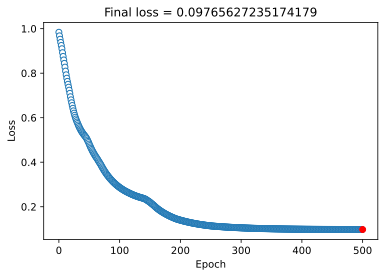

In [12]:
# final forward pass
predictions = ANNreg(x)

# final loss (MSE)
testloss = (predictions-y).pow(2).mean()

plt.plot(losses.detach(), 'o', markerfacecolor='w', linewidth=.1)
plt.plot(num_epochs, testloss.detach(), 'ro') # red-circle point -> (500, testloss)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title(f'Final loss = {testloss.item()}')
plt.show()

In [16]:
testloss, testloss.item()

(tensor(0.0977, grad_fn=<MeanBackward0>), 0.09765627235174179)

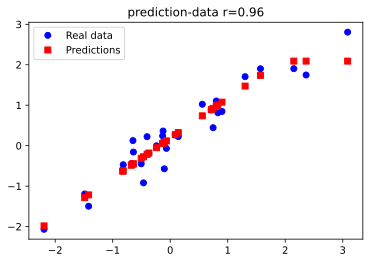

In [18]:
plt.plot(x, y, 'bo', label='Real data')
plt.plot(x, predictions.detach(), 'rs', label='Predictions')
plt.title(f"prediction-data r={np.corrcoef(y.T, predictions.detach().T)[0,1]:.2f}")
plt.legend()
plt.show()

### Additional Explorations

In [107]:
def create_train_ds(N, denominator):
    x = torch.randn(N, 1)
    y = x + torch.randn(N, 1)/denominator
    return x, y
    
def train(x, y, num_epochs=300, lr=0.01):
    model = nn.Sequential(
        nn.Linear(1,1),
        nn.ReLU(),
        nn.Linear(1,1)
    )
    
    losses = torch.zeros(num_epochs)
    loss_func = nn.MSELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    
    for i in range(num_epochs):
        y_pred = model(x)
        loss = loss_func(y_pred, y)
        losses[i] = loss
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    predictions = model(x)
    final_loss = loss_func(predictions, y).item()
    return losses, predictions, final_loss

In [19]:
# 1) How much data is "enough?"
# Try different values of N and see how the loss gets.
# Do you still get low loss ("low" is subjective, but let's say loss < 0.25) with N=10?

# 예상: 일반적으로는 (일정한 분포를 따르는) 데이터 개수가 많을수록 loss도 작아질 것임
# 하지만 분포가 일정하지 않다면 데이터 개수가 많아도 무쓸모이지 않을까 (데이터에 패턴이 없음)

# 결과: 데이터 개수가 적으면 일반적으로 loss는 커진다.
# 분포가 일정한 데이터라면 개수가 적어도 loss가 작아질 수 있다. (N = 10이라도 loss < 0.25 가능)
# 단, 데이터 분포가 일정하지 않을 때 단순한 구조의 모델로는 아무리 num_epochs가 많아져도
# 성능을 높이는 데 한계가 있다.

#### 개수는 적지만 비교적 분포가 일정한 데이터

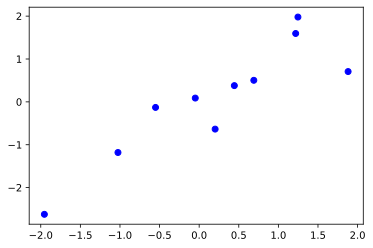

In [116]:
x, y = create_train_ds(N=10, denominator=2)
plt.plot(x, y, 'bo')
plt.show()

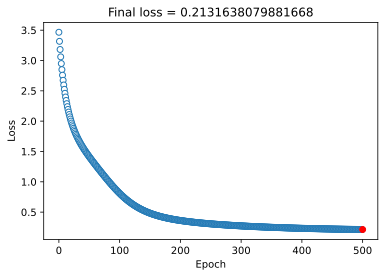

In [117]:
losses, final_pred, final_loss = train(x, y, num_epochs=500, lr=0.01)

plt.plot(losses.detach(), 'o', markerfacecolor='w', linewidth=.1)
plt.plot(500, final_loss, 'ro') # red-circle point -> (500, testloss)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title(f'Final loss = {final_loss}')
plt.show()

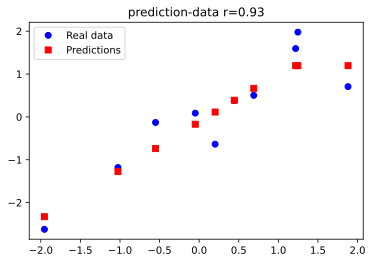

In [118]:
plt.plot(x, y, 'bo', label='Real data')
plt.plot(x, final_pred.detach(), 'rs', label='Predictions')
plt.title(f"prediction-data r={np.corrcoef(y.T, final_pred.detach().T)[0,1]:.2f}")
plt.legend()
plt.show()

#### 개수가 적은데 분포가 일정하지 않은 데이터

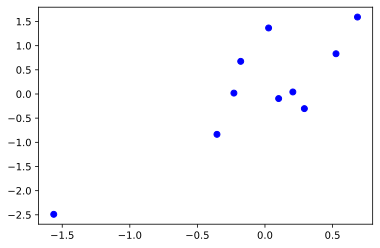

In [146]:
x, y = create_train_ds(N=10, denominator=2)
plt.plot(x, y, 'bo')
plt.show()

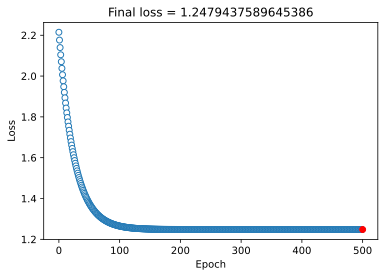

In [147]:
losses, final_pred, final_loss = train(x, y, num_epochs=500, lr=0.01)

plt.plot(losses.detach(), 'o', markerfacecolor='w', linewidth=.1)
plt.plot(500, final_loss, 'ro') # red-circle point -> (500, testloss)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title(f'Final loss = {final_loss}')
plt.show()

c:\Users\minji\.conda\envs\workspace\lib\site-packages\numpy\lib\function_base.py:2829: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
c:\Users\minji\.conda\envs\workspace\lib\site-packages\numpy\lib\function_base.py:2830: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


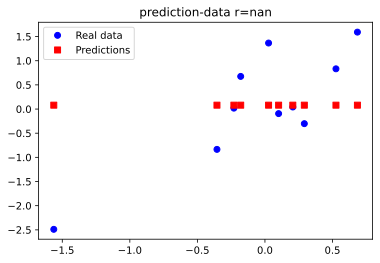

In [148]:
plt.plot(x, y, 'bo', label='Real data')
plt.plot(x, final_pred.detach(), 'rs', label='Predictions')
plt.title(f"prediction-data r={np.corrcoef(y.T, final_pred.detach().T)[0,1]:.2f}")
plt.legend()
plt.show()

#### N = 5

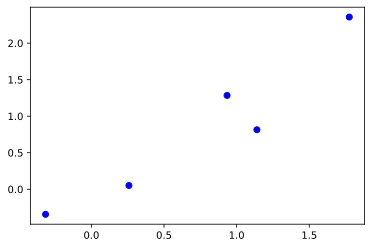

In [154]:
x, y = create_train_ds(N=5, denominator=2)
plt.plot(x, y, 'bo')
plt.show()

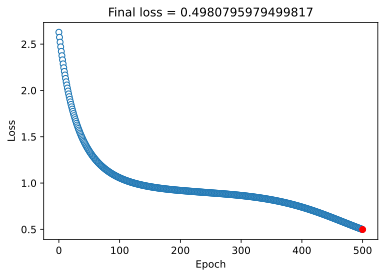

In [156]:
losses, final_pred, final_loss = train(x, y, num_epochs=500, lr=0.01)

plt.plot(losses.detach(), 'o', markerfacecolor='w', linewidth=.1)
plt.plot(500, final_loss, 'ro') # red-circle point -> (500, testloss)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title(f'Final loss = {final_loss}')
plt.show()

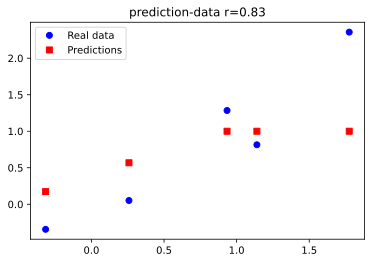

In [157]:
plt.plot(x, y, 'bo', label='Real data')
plt.plot(x, final_pred.detach(), 'rs', label='Predictions')
plt.title(f"prediction-data r={np.corrcoef(y.T, final_pred.detach().T)[0,1]:.2f}")
plt.legend()
plt.show()

In [ ]:
# 2) Does your conclusion above depend on the amount of noise in the data?
# Try changing by changing the division ("/2") when creating y as x+randn.

# 예상: noise가 많을수록 모델 성능을 끌어올리기 위해서는 data 양이 더 많이 필요하다.

# 결과: 위 1)에서 얻은 결론과 동일. 데이터에 noise가 많다 -> 일정한 패턴을 찾기 위해 필요한
# 데이터의 양이 더 많다는 것을 의미함. 데이터 내의 noise를 줄여서 데이터의 퀄리티를 높이거나,
# 일정량의 noise를 감쇄할 수 있을만큼의 추가 데이터를 더 확보하거나.

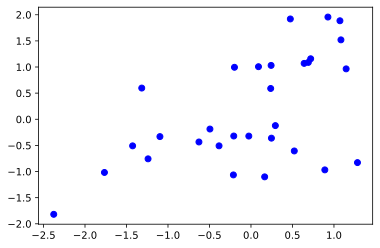

In [89]:
x, y = create_train_ds(30, 1)
plt.plot(x, y, 'bo')
plt.show()

In [ ]:
# 3) Notice that the model doesn't always work well. Put the original code (that is, N=30 and /2 noise)
# into a function or a for-loop and repeat the training 100 times (each time using a fresh model instance).
# Then count the number of times the model had a loss>.25.

In [158]:
def count_failed_test(num_loop):
    fail_cnt = 0
    
    for i in range(num_loop):
        x, y = create_train_ds(N=30, denominator=2)
        _, _, final_loss = train(x, y, num_epochs=300, lr=0.01)
        if final_loss > 0.25:
            fail_cnt += 1
    
    return fail_cnt

count_failed_test(100)

90